<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/SarcasmLogisticsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!git clone https://github.com/thanhnhan311201/CS114.L11.KHCL

fatal: destination path 'CS114.L11.KHCL' already exists and is not an empty directory.


In [144]:
!pip install stop-words

In [145]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import json
import string
from collections import Counter
import re
from nltk.stem.porter import PorterStemmer

In [146]:
nltk.download('stopwords')
ListStopWord = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
def RemoveStopWord(text):
    ans = []
    for headline in text:
        new_headline = []
        for i in headline.split():
            if i.strip().lower() not in ListStopWord:
                new_headline.append(i.strip().lower())
        new_headline = ' '.join(new_headline)
        ans.append(new_headline)
    return pd.Series(ans)

In [148]:
ps = PorterStemmer()
def Normalize(text):
    text = RemoveStopWord(text)
    text = text.apply(lambda x: re.sub('[^a-zA-Z]',' ', x))# loại bỏ các số và dấu câu.
    text = text.apply(lambda x: x.split())
    text = text.apply(lambda x: ' '.join([ps.stem(word) for word in x]))
    return text


In [149]:
data = pd.read_json("/content/CS114.L11.KHCL/LogisticsRegression/ThucHanh/Sarcasm_Project/Sarcasm_Headlines_Dataset.json", lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [150]:
del data['article_link']

In [151]:
features = data['headline']
labels = data['is_sarcastic']

In [152]:
features = Normalize(features)
labels = list(labels)
print(type(features))

<class 'pandas.core.series.Series'>


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer()


In [154]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.33)

In [155]:
y_train = np.array(y_train)
y_test = np.array(y_test) 

In [156]:
TV.fit(list(x_train))
x_train = TV.transform(x_train)

In [157]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
x_test = TV.transform(x_test)
print(lr.score(x_test, y_test))

0.7777399591558883


In [159]:
def recall(x, y_true, label):
    y_pred = lr.predict(x)
    true_pos = 0 #So lan doan nhan label va dung
    sum_pred_label = 0#Tong so lan doan nhan label
    for i in range(len(list(y_pred))):
        if y_pred[i] == label:
            sum_pred_label += 1
            if y_pred[i] == y_true[i]:
                true_pos += 1
    return true_pos/sum_pred_label 

In [160]:
print(recall(x_test, y_test, 1))

0.7743076016499706


In [161]:
data2 = pd.read_json("/content/CS114.L11.KHCL/LogisticsRegression/ThucHanh/Sarcasm_Project/Sarcasm_Headlines_Dataset_v2.json", lines=True)

In [162]:
del data2['article_link']

In [163]:
x_test = Normalize(data2['headline'])
y_test = np.array(data2['is_sarcastic'])

In [164]:
x_test = TV.transform(x_test)

In [165]:
print(lr.score(x_test, y_test))

0.8329082078339565


In [166]:
print(recall(x_test, y_test, 1))

0.8742601048537122


In [167]:
y_pred = lr.predict(x_test)

In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test, y_pred, labels= [0, 1])
print(conf_matrix)
print(classification_report(y_test, y_pred, labels= [0, 1]))

[[13498  1487]
 [ 3295 10339]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     14985
           1       0.87      0.76      0.81     13634

    accuracy                           0.83     28619
   macro avg       0.84      0.83      0.83     28619
weighted avg       0.84      0.83      0.83     28619



In [169]:
import seaborn as sns

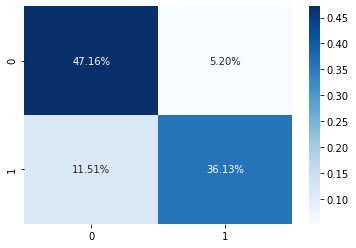

In [176]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot = True, fmt='.2%', cmap='Blues')

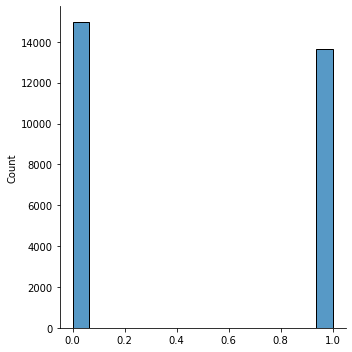

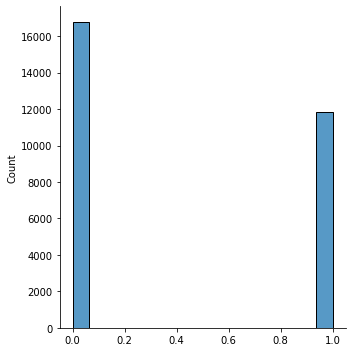

In [185]:
f1 = sns.displot(y_test)
f2 = sns.displot(y_pred)